In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv("Sugarcane Production.csv")
df

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,"28.386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11.949,8"


In [3]:
df.shape

(103, 7)

## data cleaning

In [4]:
df['Production (Tons)']=df['Production (Tons)'].str.replace(".","")
df['Production per Person (Kg)']=df['Production per Person (Kg)'].str.replace(".","").str.replace(",",".")
df['Production (Tons)']=df['Production (Tons)'].str.replace(".","")
df['Acreage (Hectare)']=df['Acreage (Hectare)'].str.replace(".","")
df['Yield (Kg / Hectare)']=df['Yield (Kg / Hectare)'].str.replace(".","").str.replace(",",".")

In [5]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [6]:
df.rename(columns={"Production (Tons)":"Production(Tons)"},inplace=True)
df.rename(columns={"Production per Person (Kg)":"Production_per_Person(Kg)"},inplace=True)
df.rename(columns={"Acreage (Hectare)":"Acreage(Hectare)"},inplace=True)
df.rename(columns={"Yield (Kg / Hectare)":"Yield(Kg/Hectare)"},inplace=True)

In [7]:
df.head()

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [8]:
## handling null values
df.isnull().sum()

Unnamed: 0                   0
Country                      0
Continent                    0
Production(Tons)             0
Production_per_Person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [9]:
df[df["Yield(Kg/Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [10]:
df.dropna().reset_index()

,index,Unnamed: 0,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,0,0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,1,1,India,Asia,348448000,260721,4950000,70393.5
2,2,2,China,Asia,123059739,88287,1675215,73459.1
3,3,3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...,...
97,97,97,Spain,Europe,394,8,9,43596.5
98,98,98,Lebanon,Asia,97,16,3,28386.4
99,100,100,Singapore,Asia,50,9,2,25
100,101,101,Samoa,Oceania,12,6,1,11949.8


In [11]:
df.drop("Unnamed: 0",axis= 1,inplace=True)

In [12]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [13]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_Person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [14]:
df['Production(Tons)']=df['Production(Tons)'].astype(float)
df['Production_per_Person(Kg)']=df['Production_per_Person(Kg)'].astype(float)
df['Acreage(Hectare)']=df['Acreage(Hectare)'].astype(float)
df['Yield(Kg/Hectare)']=df['Yield(Kg/Hectare)'].astype(float)

In [15]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_Person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

In [16]:
df.nunique()

Country                      103
Continent                      6
Production(Tons)             103
Production_per_Person(Kg)    102
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

## Univariate analysis

In [17]:
df

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0
...,...,...,...,...,...,...
98,Lebanon,Asia,97.0,16.000,3.0,28386.4
99,Djibouti,Africa,53.0,51.000,NaN,NaN
100,Singapore,Asia,50.0,9.000,2.0,25.0
101,Samoa,Oceania,12.0,6.000,1.0,11949.8


####  how many countries produce sugarcane from each continent

In [18]:
df['Continent'].value_counts()

Continent
Africa           39
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

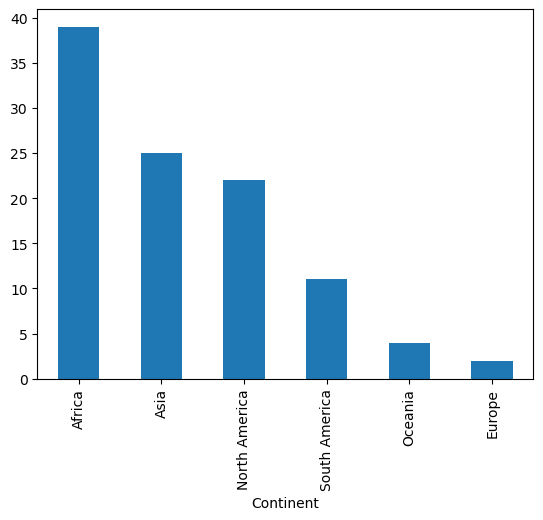

In [19]:
df['Continent'].value_counts().plot(kind="bar")

#### Distribution of columns

C:\Users\maddh\AppData\Local\Temp\ipykernel_26716\1416176753.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production(Tons)"])
C:\Users\maddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maddh\AppData\Local\Temp\ipykernel_26716\1416176753.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar f

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Density'>

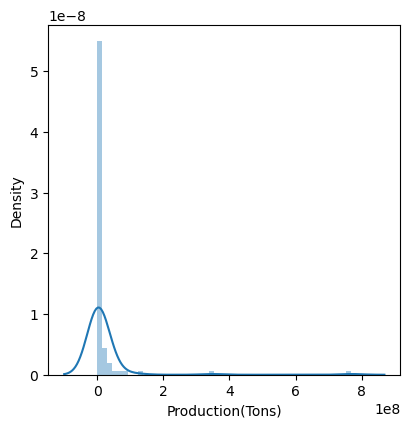

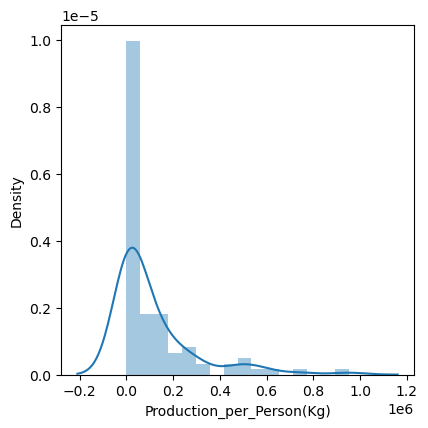

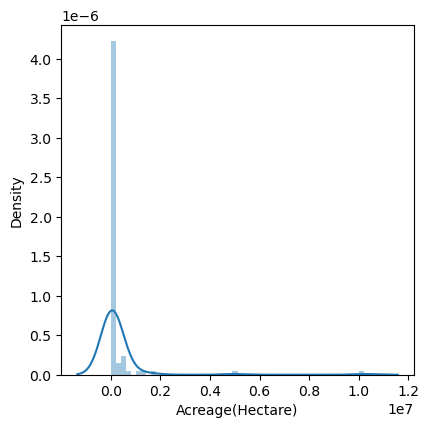

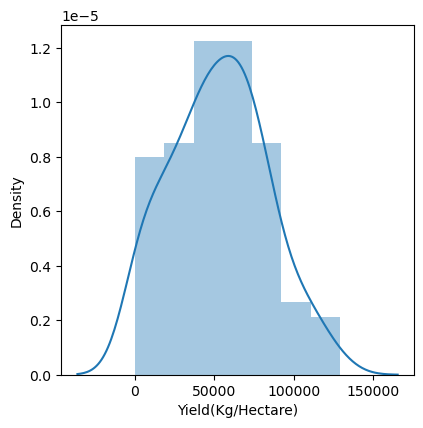

In [20]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production(Tons)"])

plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
sns.distplot(df["Production_per_Person(Kg)"])

plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
sns.distplot(df["Acreage(Hectare)"])

plt.figure(figsize=(10,10))
plt.subplot(2,2,4)
sns.distplot(df["Yield(Kg/Hectare)"])

#### checking outliers

<Axes: >

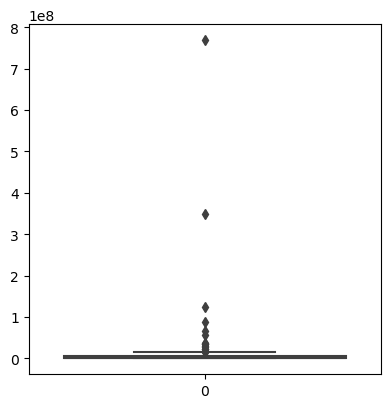

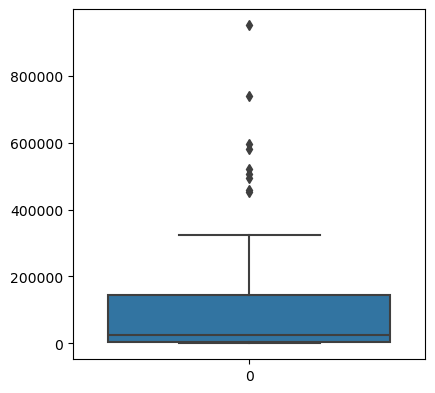

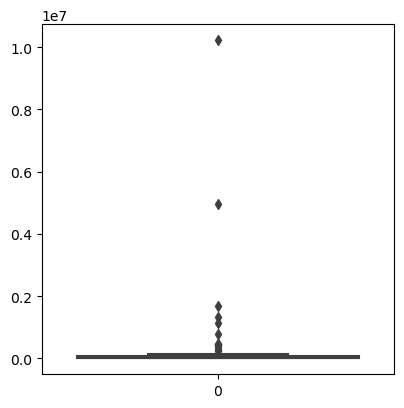

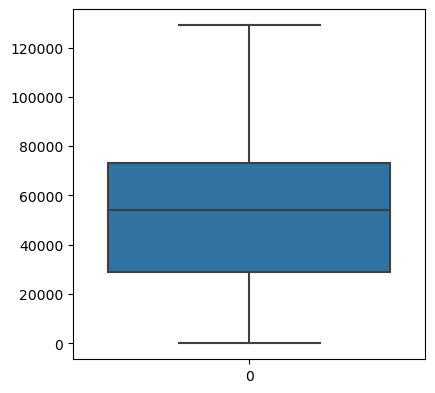

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])

plt.figure(figsize=(10,10))
plt.subplot(2,2,2)
sns.boxplot(df["Production_per_Person(Kg)"])

plt.figure(figsize=(10,10))
plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])

plt.figure(figsize=(10,10))
plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])

In [22]:
df.describe()

,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
count,1.030000e+02,103.000000,1.020000e+02,102.000000
mean,1.832407e+07,111856.305311,2.498981e+05,52628.078431
std,8.379760e+07,176134.928689,1.137003e+06,30504.676683
min,1.000000e+00,0.000000,0.000000e+00,10.000000
25%,4.298850e+04,3364.869000,1.104000e+03,29072.025000
50%,1.422432e+06,25481.000000,1.655800e+04,54108.950000
75%,6.145648e+06,144004.500000,8.047400e+04,73282.700000
max,7.686784e+08,951087.000000,1.022620e+07,129049.300000


## Bivariate Analsis

#### 1. which country produces maximum sugarcane

In [23]:
df_new=df[["Country","Production(Tons)"]].set_index('Country')

In [24]:
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Lebanon,97.0
Djibouti,53.0
Singapore,50.0


In [25]:
df_new["Production(Tons)_percentage"]=df_new["Production(Tons)"]*100/df_new["Production(Tons)"].sum()


In [26]:
df_new

,Production(Tons),Production(Tons)_percentage
Country,,
Brazil,768678382.0,4.072728e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Lebanon,97.0,5.139401e-06
Djibouti,53.0,2.808126e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production(Tons)_percentage'>

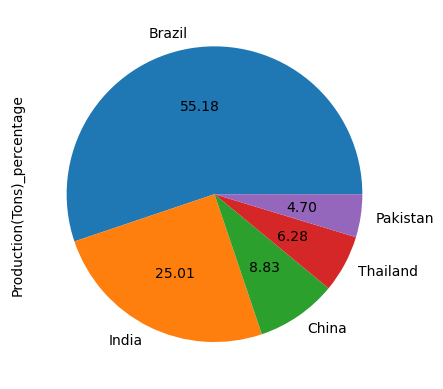

In [27]:
df_new["Production(Tons)_percentage"].head(5).plot(kind="pie",autopct='%.2f')

<Axes: xlabel='Country'>

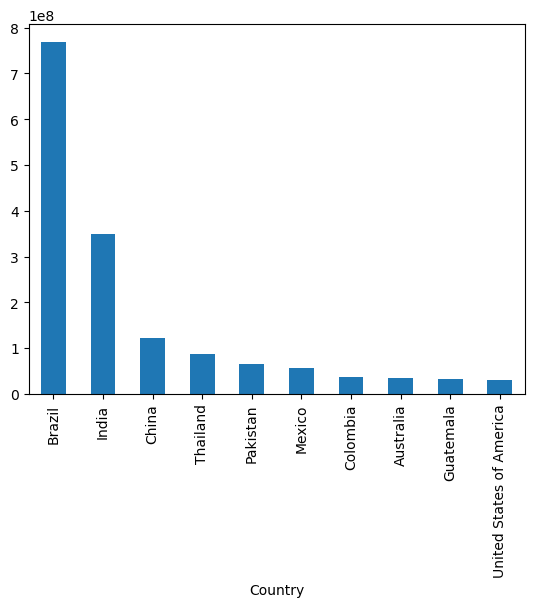

In [28]:

df_new["Production(Tons)"].head(10).plot(kind="bar")

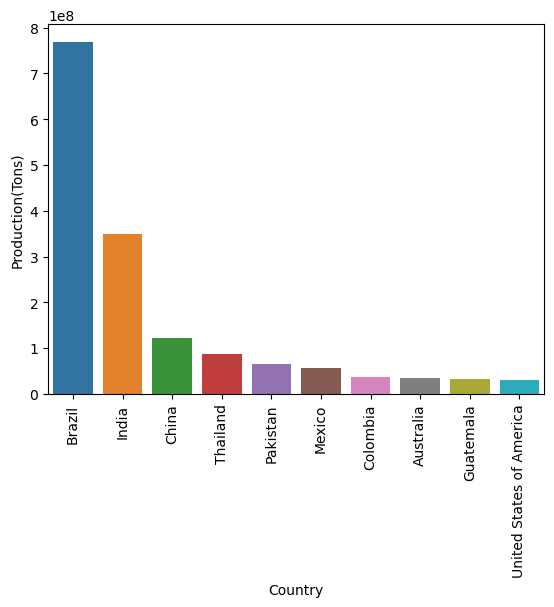

In [29]:
df_ton=df.sort_values("Production(Tons)",ascending=False)
ax=sns.barplot(data=df_ton.head(10),x="Country",y= "Production(Tons)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### 2. which country has the highest land

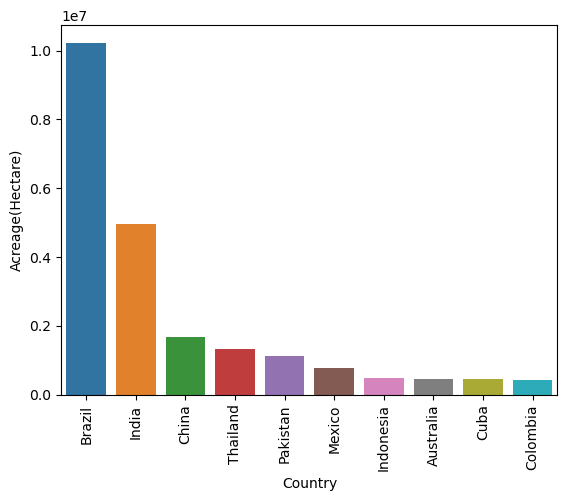

In [30]:
df_acr=df.sort_values("Acreage(Hectare)",ascending=False)
ax=sns.barplot(data=df_acr.head(10) ,x="Country",y= "Acreage(Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### 3. which country has highest yield per hectare

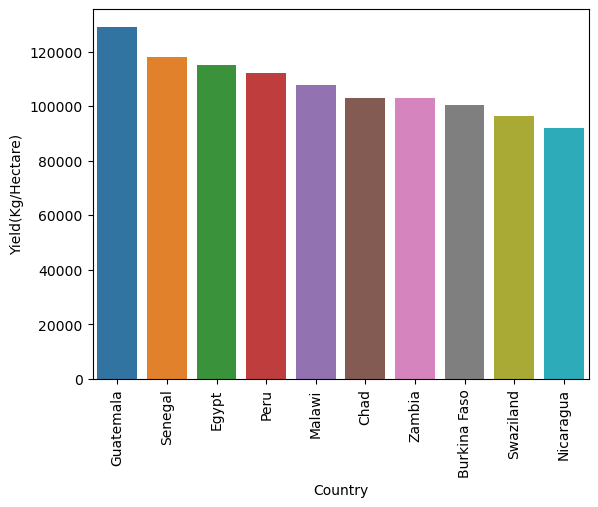

In [31]:
df_hec=df.sort_values("Yield(Kg/Hectare)",ascending=False)
ax=sns.barplot(data=df_hec.head(10) ,x="Country",y= "Yield(Kg/Hectare)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### 3. Which Country Has the Highest Production per Person?


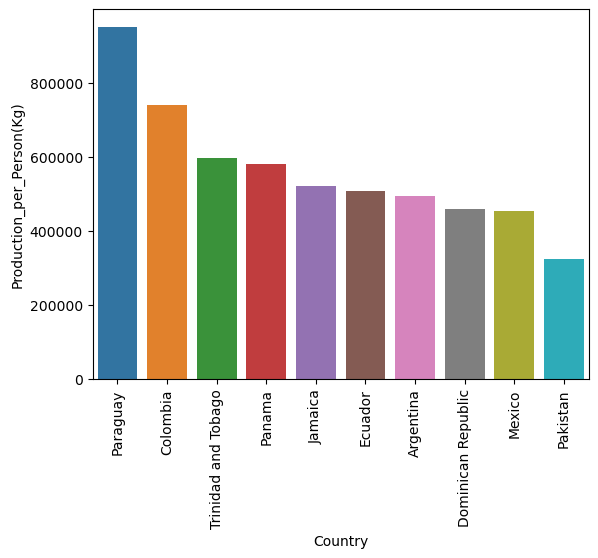

In [32]:
df_hec=df.sort_values("Production_per_Person(Kg)",ascending=False)
ax=sns.barplot(data=df_hec.head(10) ,x="Country",y= "Production_per_Person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### 4. which country has the highest production

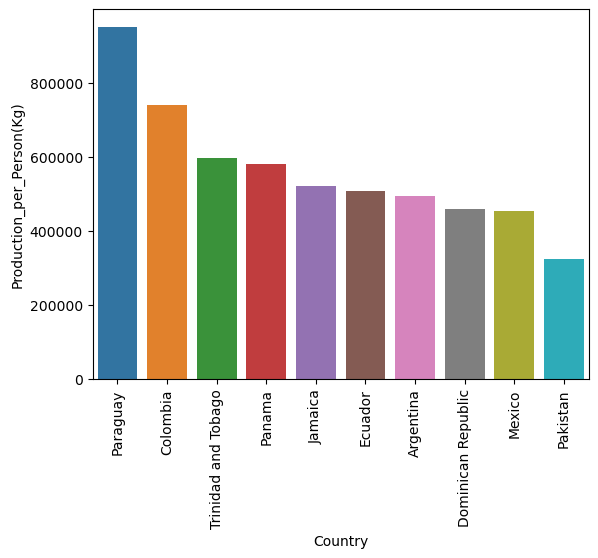

In [33]:
df_pr=df.sort_values("Production_per_Person(Kg)",ascending=False)
ax=sns.barplot(data=df_pr.head(10) ,x="Country",y= "Production_per_Person(Kg)")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### 5. Correlation

In [34]:
df.head()

,Country,Continent,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


#### 5. Do countries with highest land produce more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

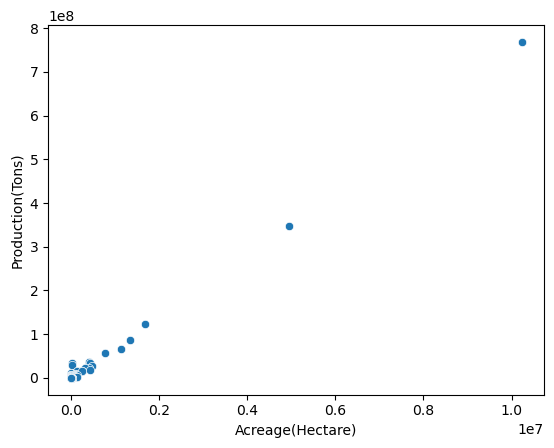

In [35]:
#sns.heatmap(df.corr(),annot=True,cmap="Green")-- its also showing error
sns.scatterplot(data=df,x="Acreage(Hectare)",y="Production(Tons)")
# yes country with highest land produce more sugarcane.

#### 6. Do Countries Yield More Sugarcane per Hectare Produce More Sugarcane in Total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

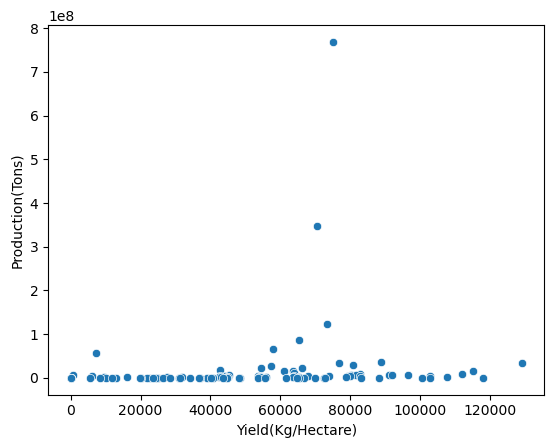

In [36]:
sns.scatterplot(data=df,x="Yield(Kg/Hectare)",y="Production(Tons)")
#The plot indicates that higher yields do not always correlate with higher total production.

#### 7. Analysis for continent

In [37]:
df_continent=df.groupby("Continent").sum().sort_values('Production(Tons)',ascending=False)

In [38]:
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Continent,,,,,
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,2332687.293,1439089.0,2142107.5
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9


#### 8. Which continent produces maximum sugarcane?

<Axes: xlabel='Continent'>

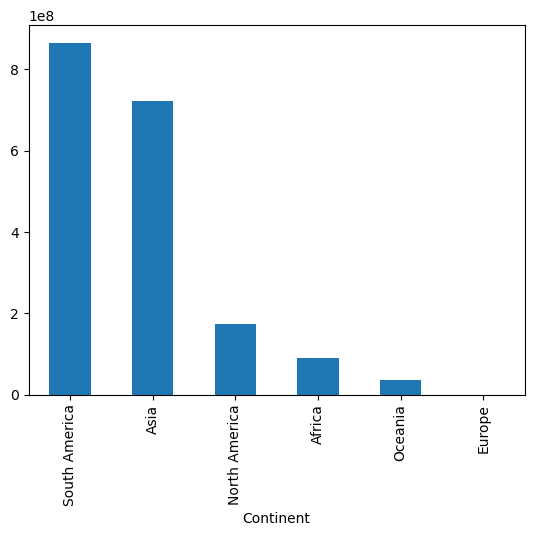

In [39]:

df_continent["Production(Tons)"].sort_values(ascending=False).plot(kind="bar")

<Axes: xlabel='Continent'>

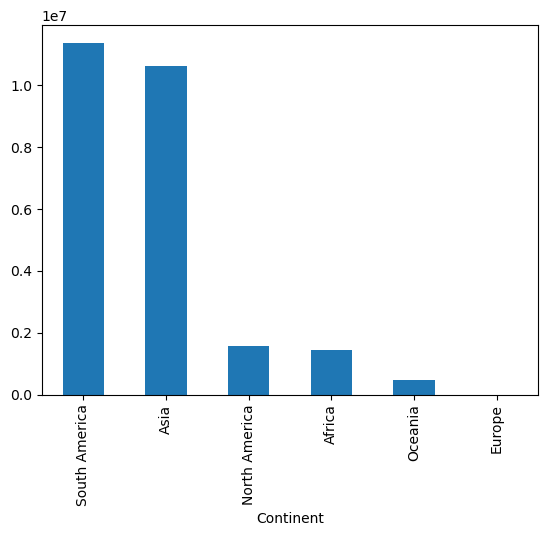

In [40]:
df_continent["Acreage(Hectare)"].sort_values(ascending=False).plot(kind="bar")

#### 9. Do number of countries in a continent effects production of sugarcane?

In [41]:
df_continent["number_of_countries"]=df.groupby("Continent").count()["Country"]

In [42]:
df_continent=df_continent.sort_values("number_of_countries",ascending=False)
df_continent

,Country,Production(Tons),Production_per_Person(Kg),Acreage(Hectare),Yield(Kg/Hectare),number_of_countries
Continent,,,,,,
Africa,EgyptSouth AfricaKenyaSwazilandSudanZambiaMaur...,89681525.0,2332687.293,1439089.0,2142107.5,39
Asia,IndiaChinaThailandPakistanIndonesiaPhilippines...,721930425.0,1857769.303,10608319.0,1171871.4,25
North America,MexicoGuatemalaUnited States of AmericaCubaEl ...,173995947.0,3796081.508,1581983.0,1082602.4,22
South America,BrazilColombiaArgentinaPeruEcuadorBoliviaParag...,865588126.0,3505531.738,11369236.0,677192.7,11
Oceania,AustraliaFijiPapua New GuineaSamoa,36177574.0,28593.605,490909.0,162419.1,4
Europe,PortugalSpain,5823.0,536.000,71.0,131870.9,2


C:\Users\maddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


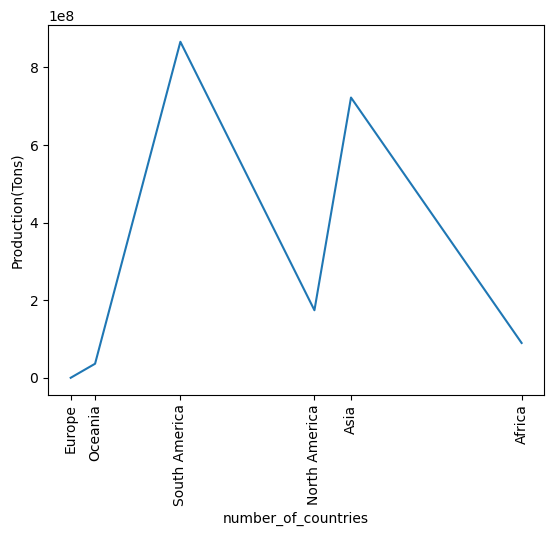

In [43]:
continent_names=df_continent.index.to_list()
sns.lineplot(data=df_continent,x="number_of_countries",y="Production(Tons)")
plt.xticks(df_continent["number_of_countries"],continent_names,rotation=90)
plt.show()
# no number of countries does not impact the production of sugarcane

#### 10. Do continent with highest land produces more sugarcane?

In [44]:
# YES

#### Production distribution by Continent

<Axes: ylabel='Production(Tons)'>

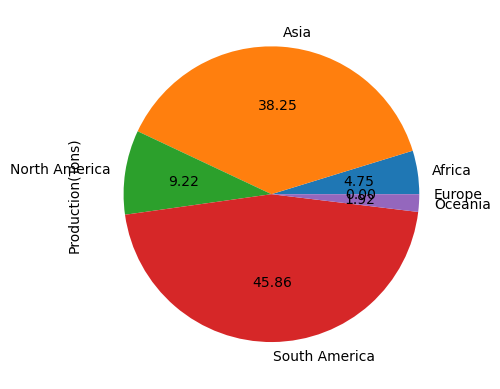

In [45]:
df_continent["Production(Tons)"].plot(kind="pie",autopct="%.2f")

#### overview of the dataset’s distributions and correlations

C:\Users\maddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\maddh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

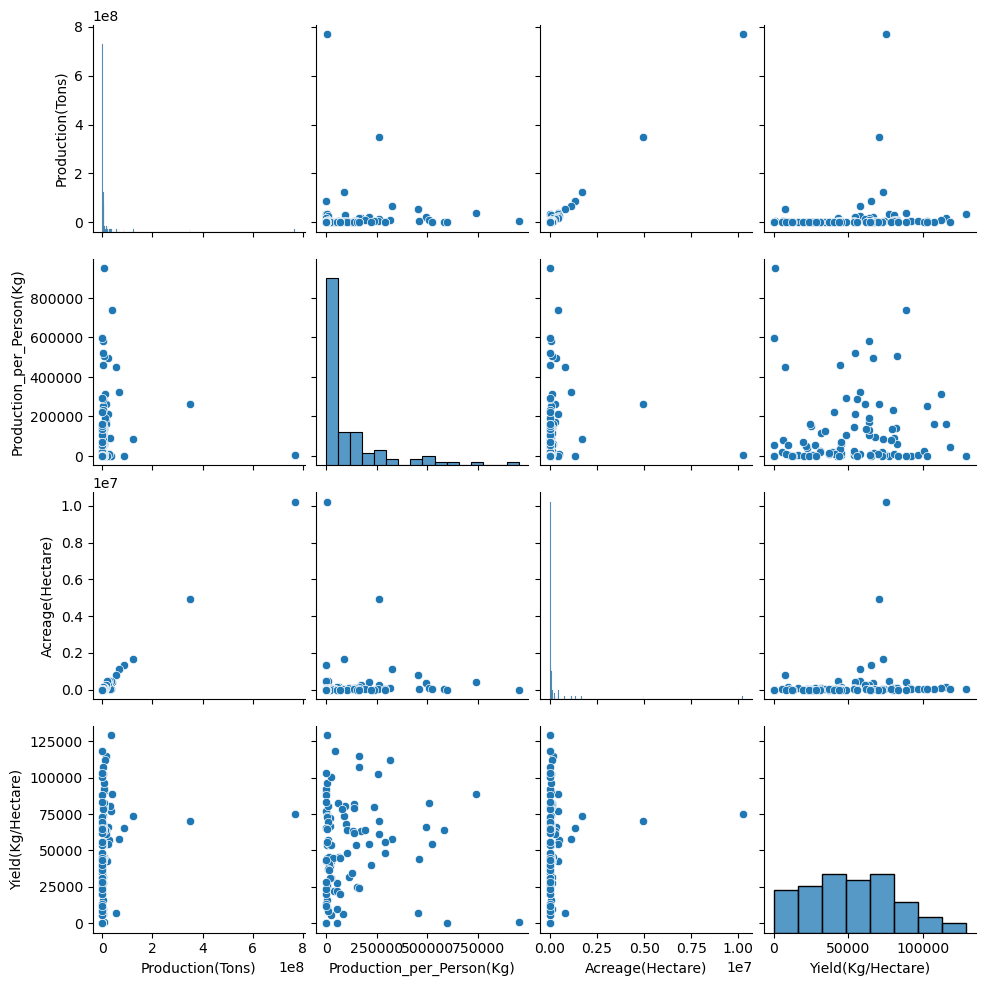

In [46]:
sns.pairplot(df)

## Conclusion

### Total Production by Continent:
#### 1. South America: Leading producer.
#### 2. Asia: Second in production.
#### 3. North America: Third.

### We analyze the impact of the number of countries on sugarcane production per continent.
#### Key Insight:
#### Even continents with fewer countries (e.g., South America) can have high total production due to a few dominant producers 
#### (e.g., Brazil).

#### we also conclude that higher yields do not always correlate with higher total production and  larger land areas correlate with higher production.


### This project provides a comprehensive analysis of global sugarcane production, offering insights into the distribution of production, the role of land usage, and yield efficiency across different countries and continents. By understanding these factors, agricultural strategies can be improved, and resource management in the sugarcane industry can be optimized.

